In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

In [3]:
train_b = np.loadtxt('BDT_background_train.txt')
train_s = np.loadtxt('BDT_signal_train.txt')

test_b = np.loadtxt('BDT_background_test.txt')
test_s = np.loadtxt('BDT_signal_test.txt')

In [4]:
# Training data 

# Background
train_xb = train_b[:,0]
train_yb = train_b[:,1]
train_zb = train_b[:,2]

# Signal
train_xs = train_s[:,0]
train_ys = train_s[:,1]
train_zs = train_s[:,2]

In [5]:
# Testing data 

# Background
test_xb = test_b[:,0]
test_yb = test_b[:,1]
test_zb = test_b[:,2]

# Signal
test_xs = test_s[:,0]
test_ys = test_s[:,1]
test_zs = test_s[:,2]

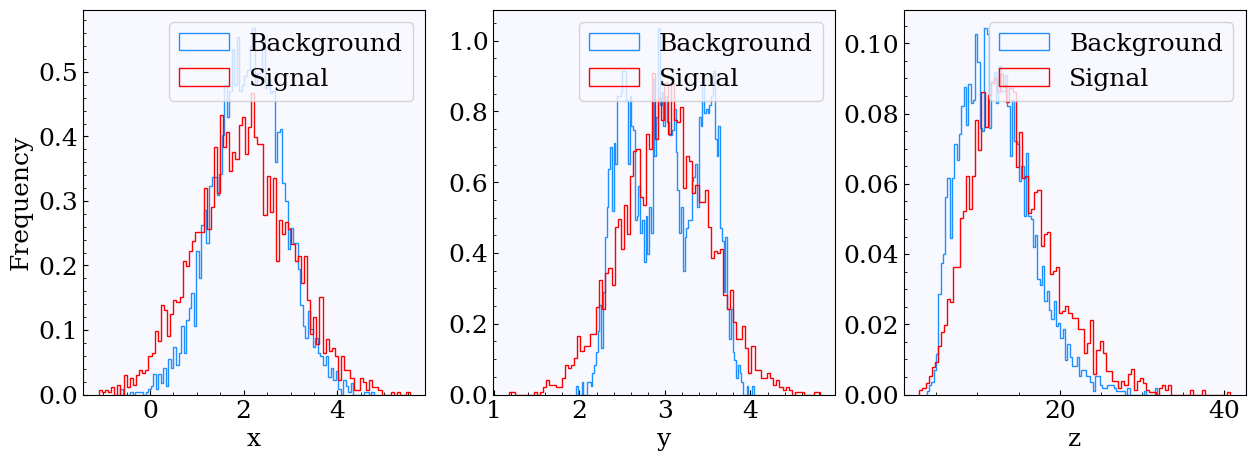

In [9]:
# Plot 1D histograms of the training data for each variable 

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].hist(train_xb, bins=100, histtype='step', label='Background', density=True)
ax[0].hist(train_xs, bins=100, histtype='step', label='Signal', density=True)

ax[1].hist(train_yb, bins=100, histtype='step', label='Background', density=True)
ax[1].hist(train_ys, bins=100, histtype='step', label='Signal', density=True)

ax[2].hist(train_zb, bins=100, histtype='step', label='Background', density=True)
ax[2].hist(train_zs, bins=100, histtype='step', label='Signal', density=True)

ax[0].set(xlabel='x', 
          ylabel='Frequency')

ax[1].set(xlabel='y')

ax[2].set(xlabel='z')

ax[0].legend()
ax[1].legend()
ax[2].legend();

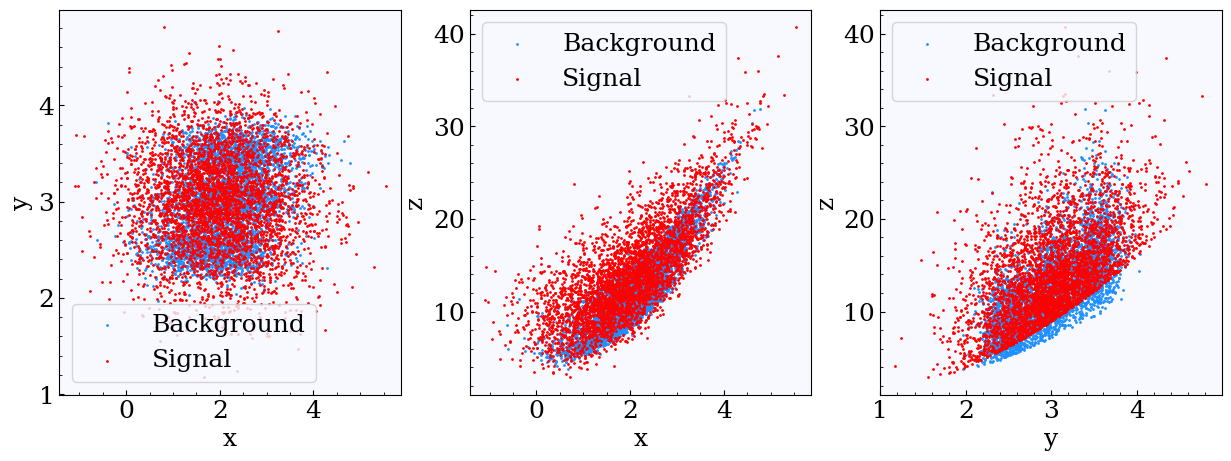

In [10]:
# plot scatter plots of the training data for each variable

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(train_xb, train_yb, label='Background', s=1)
ax[0].scatter(train_xs, train_ys, label='Signal', s=1)

ax[1].scatter(train_xb, train_zb, label='Background', s=1)
ax[1].scatter(train_xs, train_zs, label='Signal', s=1)

ax[2].scatter(train_yb, train_zb, label='Background', s=1)
ax[2].scatter(train_ys, train_zs, label='Signal', s=1)

ax[0].set(xlabel='x',
            ylabel='y')

ax[1].set(xlabel='x',
            ylabel='z')

ax[2].set(xlabel='y',
            ylabel='z')

ax[0].legend()
ax[1].legend()
ax[2].legend();

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Look into Light GBM for gradient boosting


# Create the AdaBoost classifier
bdt = AdaBoostClassifier(n_estimators=100, learning_rate=0.01)

# Training data
train_data = np.vstack((train_b, train_s)) 
train_target = np.hstack((np.zeros(len(train_b)), np.ones(len(train_s))))

# Testing data
test_data = np.vstack((test_b, test_s))
test_target = np.hstack((np.zeros(len(test_b)), np.ones(len(test_s))))

# Train the classifier  
model = bdt.fit(train_data, train_target)

# Test the classifier
y_pred = model.predict_proba(test_data)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(test_target, y_pred))
y_pred

array([[0.45981214, 0.54018786],
       [0.53300607, 0.46699393],
       [0.53394878, 0.46605122],
       ...,
       [0.46743823, 0.53256177],
       [0.46743823, 0.53256177],
       [0.46743823, 0.53256177]])

(array([11.1676789 ,  3.8326096 , 24.02917029,  0.05741737, 13.89500409,
         2.18186015,  0.64594544,  1.24882785,  0.07177172,  0.28708686]),
 array([0.45482111, 0.47223744, 0.48965377, 0.5070701 , 0.52448643,
        0.54190276, 0.5593191 , 0.57673543, 0.59415176, 0.61156809,
        0.62898442]),
 [<matplotlib.patches.Polygon at 0x7fda84873460>])

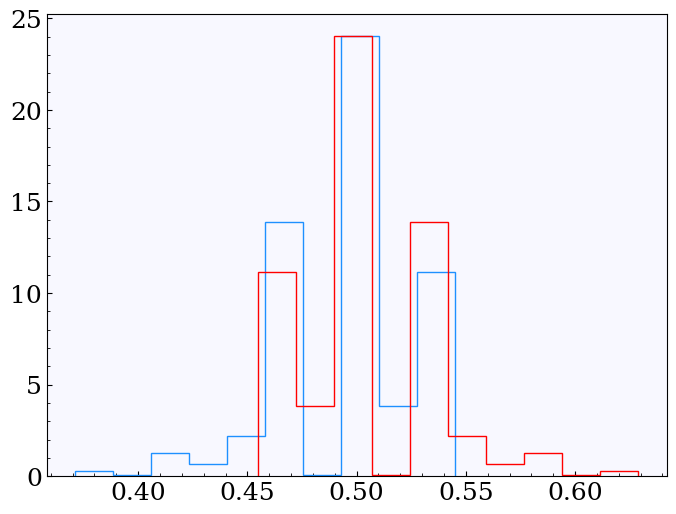

In [51]:
# Plot prediction score

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.hist(y_pred[:,0], bins=10, histtype='step', label='Background', density=True)
ax.hist(y_pred[:,1], bins=10, histtype='step', label='Signal', density=True)


